In [30]:
from easse import fkgl, quality_estimation # samsa fails dep: tupa
import pandas as pd

def read_split_lines(filename, split_sep='\t'):
    """from easse/utils/helpers.py"""
    with open(filename, encoding="utf-8") as f:
        split_instances = []
        for line in f:
            split_instances.append([split.strip() for split in line.split(split_sep)])

#     print(split_instances[:3])
    return split_instances

d = {}
for level in [1, 2, 3, 4]:
    src_sents, ref_sents = [], []
    d.update({f'Simp-{level}': {}})
#     for split in ['train', 'test', 'dev']:
    for split in ['test']:
        split_lines = read_split_lines(f'/srv/scratch6/kew/ats/data/en/aligned/newsela_manual_v0_v{level}_{split}.tsv')
        src_sents += [i[0] for i in split_lines]
        ref_sents += [i[1] for i in split_lines]
    d[f'Simp-{level}']['fkgl'] = fkgl.corpus_fkgl(ref_sents)
    d[f'Simp-{level}'].update(quality_estimation.corpus_quality_estimation(src_sents, ref_sents))

# print(d)
gdf = pd.DataFrame(d)
gdf

# gdf.drop(index=['Lexical complexity score'], inplace=True)
gdf.plot(kind='bar')


,Simp-1,Simp-2,Simp-3,Simp-4
fkgl,7.967425,6.411884,4.911990,3.395687
Compression ratio,1.008842,0.981254,0.924650,0.848538
Sentence splits,1.194612,1.415581,1.548652,1.792057
Levenshtein similarity,0.903890,0.819974,0.734684,0.646108
Exact copies,0.441096,0.229462,0.132686,0.089844
Additions proportion,0.095019,0.170325,0.243690,0.299468
Deletions proportion,0.099040,0.198756,0.313716,0.431747
Lexical complexity score,8.559383,8.517484,8.467479,8.525171


<AxesSubplot:>

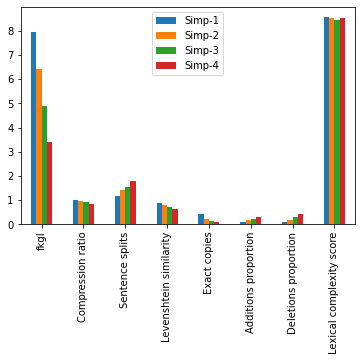

In [18]:
dir(fkgl)

['FKGLScorer',
 'List',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'corpus_fkgl',
 'count_syllables_in_sentence',
 'count_words',
 'normalize',
 'to_sentences']